## 1. Install the required packages

In [15]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Import the required libraries

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
# cifar10 dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 3. DATA PREPROCESSING

### 3.1 Load the data

In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# X represents the images, and y represents the labels

In [18]:
# Check if the data is loaded correctly
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 3.2 Normalize the data

In [19]:
# The images in X_train and X_test are initially loaded as integers (uint8), with pixel values ranging from 0 to 255.
#  convert the images to float32 - this is the datatype that the model expects.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

### 3.3 Split the data into training and testing sets

In [20]:

from sklearn.model_selection import train_test_split
# 20% of the training data will be used for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
# check the shape of the data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 3.4 Reshape the data to fit the model input

In [22]:
# Convert the labels to one-hot encoding
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)  # For CIFAR-10
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [23]:
# test the new data:
print(y_train.shape)
print(y_test.shape)


(40000, 10)
(10000, 10)


### 3.5 Get the stats of the data

In [24]:
# get how many images are there for each class
def display_stats(arr):
    for i in range(10):
        print(f'{i}: {np.sum(arr == i)}')


# test the function
display_stats(np.argmax(y_train, axis=1))

0: 4027
1: 4021
2: 3970
3: 3977
4: 4067
5: 3985
6: 4004
7: 4006
8: 3983
9: 3960


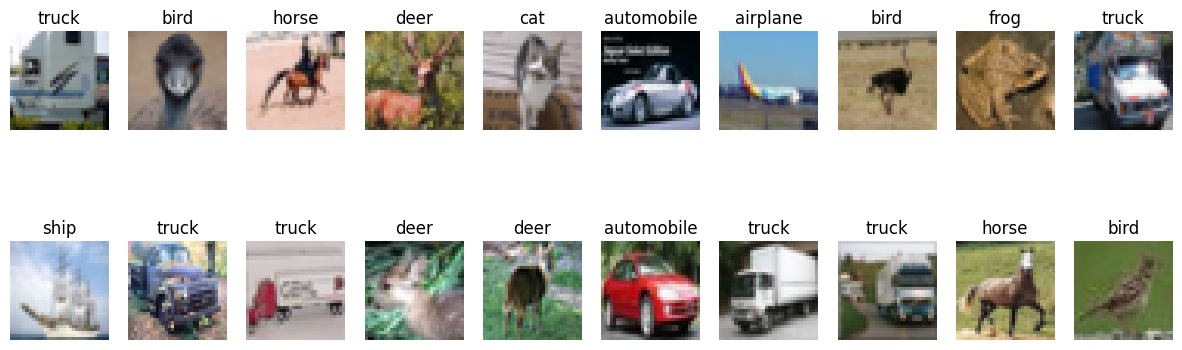

In [25]:
## Get all the labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## display the first 20 random images from the training set with their labels names
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
axes = axes.flatten()
for i in range(20):
    # Get a random index from 0 to the length of the training set
    idx = np.random.randint(0, X_train.shape[0])

    # Display image
    axes[i].imshow(X_train[idx])
    # Get the image label and set it as the title
    image_label = y_train[idx].argmax()
    label_name = labels[image_label]
    axes[i].set_title(label_name)
    # Get the label name from the label list
    
    axes[i].axis('off')
plt.show()


## 4. BUILD THE MODEL

### 4.1 Define the model

In [33]:
# Create a Vanilla CNN model
def create_vanilla_cnn_model(shape, classes):
    model = Sequential()


    # Input Layer
    model.add(Input(shape=shape))


    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Convolutional Block 3
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))


    return model


In [34]:
# Define the input shape and number of classes
INPUT_SHAPE = (32, 32, 3)
NUM_CLASSES = 10

# Create the model
model = create_vanilla_cnn_model(INPUT_SHAPE, NUM_CLASSES)

### 4.2 Compile the model

In [35]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

### 4.3 Model Summary

In [36]:
# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 8, 8, 128)      │             

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

### 4.4 Train the model

In [37]:
EPOCHS = 50
BATCH_SIZE = 64


# Training
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,validation_data=(X_val, y_val))


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 149ms/step - accuracy: 0.3607 - loss: 1.8764 - val_accuracy: 0.5823 - val_loss: 1.1644
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 151ms/step - accuracy: 0.6004 - loss: 1.1314 - val_accuracy: 0.5743 - val_loss: 1.2315
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.6836 - loss: 0.9052 - val_accuracy: 0.6939 - val_loss: 0.8560
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 152ms/step - accuracy: 0.7247 - loss: 0.7787 - val_accuracy: 0.7489 - val_loss: 0.7202
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - accuracy: 0.7554 - loss: 0.6994 - val_accuracy: 0.7684 - val_loss: 0.6786
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 167ms/step - accuracy: 0.7768 - loss: 0.6379 - val_accuracy: 0.7564 - val_loss: 0.7043
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 156ms/step - accuracy: 0.7959 - loss: 0.5929 - val_accuracy: 0.7921 - val_loss: 0.5997
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - accuracy: 0.8074 - loss

### 4.5 Evaluate the model

In [38]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8541 - loss: 0.5722
Test accuracy: 0.8499000072479248


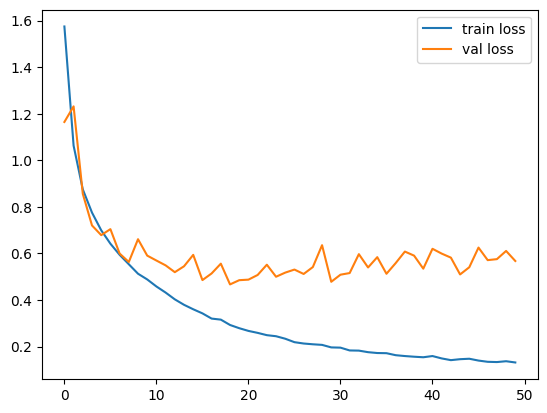

In [39]:
### Plotting the training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


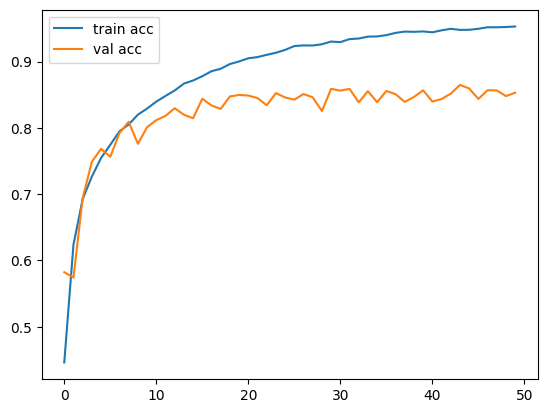

In [40]:
## Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

### 4.6 Save the model

In [41]:
# Save the model
from datetime import datetime

# Get the model name + date-time stamp
model_name = 'cnn_model.h5'
data_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
model_name = model_name.split('.')[0] + '_' + data_time + '.h5'

## Get the directory where the model will be saved
model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, model_name)

# Save the model
model.save(model_path)


## 5. PREDICTION

In [44]:
# Make some predictions
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


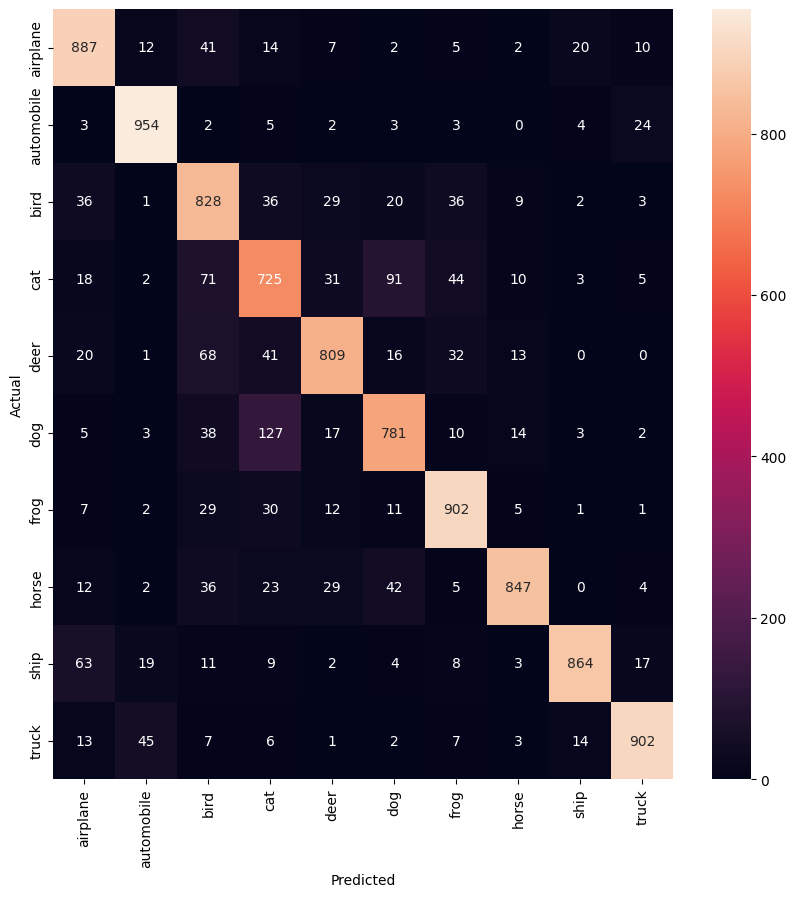

In [48]:

## Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Get the indices to be plotted
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, predictions.argmax(axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



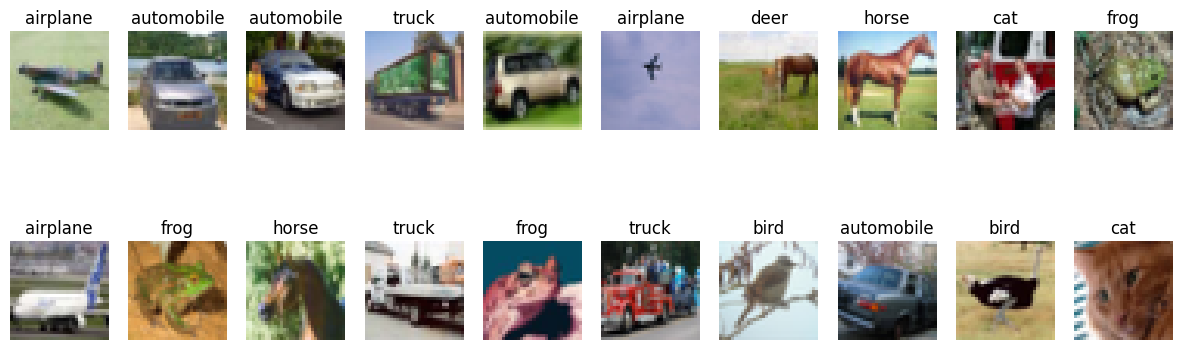

In [49]:
# Display the first 20 random images from the test set with their predicted labels
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
axes = axes.flatten()
for i in range(20):
    # Get a random index from 0 to the length of the test set
    idx = np.random.randint(0, X_test.shape[0])

    # Display image
    axes[i].imshow(X_test[idx])
    # Get the image label and set it as the title
    image_label = predictions[idx].argmax()
    label_name = labels[image_label]
    axes[i].set_title(label_name)
    # Get the label name from the label list
    
    axes[i].axis('off')

plt.show()
